# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [96]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import numpy as np
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from xgboost import X
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [97]:
# please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

or else , you can use below code

In [98]:
"""
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

"""

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

## 1.1 Loading Data

In [99]:
# make sure you are loading atleast 50k datapoints
# you can work with features of preprocessed_data.csv for the assignment.
data = pd.read_csv('preprocessed_data.csv', nrows=100000)

In [100]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

In [101]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [102]:
data.shape

(100000, 9)

In [103]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


<font color='blue'><b>Calculating Sentiment scores:</b></font>

In [105]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

In [106]:
# Applying Sentiment Analyzer
sentiment_scores_essay = []
for sentence in data['essay']:
    sentiment_scores_essay.append(sid.polarity_scores(sentence))

In [107]:
neg = []
neu = []
pos = []
comp = []
for row in sentiment_scores_essay:
    neg.append(row['neg'])
    neu.append(row['neu'])
    pos.append(row['pos'])
    comp.append(row['compound'])

In [108]:
data['essay_sentiment_neg'] = neg
data['essay_sentiment_neu'] = neu
data['essay_sentiment_pos'] = pos
data['essay_sentiment_comp'] = comp

In [109]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,essay_sentiment_neg,essay_sentiment_neu,essay_sentiment_pos,essay_sentiment_comp
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.680,0.248,0.9897


In [110]:
data.shape

(100000, 13)

In [111]:
y = data['project_is_approved']
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,essay_sentiment_neg,essay_sentiment_neu,essay_sentiment_pos,essay_sentiment_comp
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867


In [112]:
X.shape

(100000, 12)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [114]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*120)

(80000, 12) (80000,)
(20000, 12) (20000,)


<h2>1.2. Make Data Model Ready: encoding essay</h2>

In [115]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay'
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
vectorizer_essay_tfidf.fit(X_train['essay'])

X_train_essay_tfidf = vectorizer_essay_tfidf.transform(X_train['essay'])
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(X_test['essay'])

print('After TF-IDF vectorizations')
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print('='*120)

After TF-IDF vectorizations
(80000, 14703) (80000,)
(20000, 14703) (20000,)


## 1.3. Using Pretrained Models: TFIDF weighted W2V

In [116]:
preprocessed_essays_xtrain = X_train['essay'].values # fit has to happen only on train data
#preprocessed_essays[0]

In [117]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays_xtrain)
print('Shape of matrix after one hot encoding: ',text_bow.shape)

Shape of matrix after one hot encoding:  (80000, 14703)


In [118]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_xtrain)

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
#tfidf_words

In [119]:
# average Word2Vec
# compute average word2vec for each sentence
X_train_tfidf_w2v_vectors = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xtrain):
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight = 0
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word [len(vec)=300]
            # here we multiplying idf value(dictionary[word] and the tf value((sentence.count(word)/len(sentence.split()))))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # (idf*tf) getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors.append(vector)
    
print(len(X_train_tfidf_w2v_vectors))
print(len(X_train_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 80000/80000 [04:21<00:00, 306.41it/s]

80000
300


In [120]:
preprocessed_essays_xtest = X_test['essay'].values
#preprocessed_essays[0]

In [121]:
# average Word2Vec
# compute average word2vec for each sentence
X_test_tfidf_w2v_vectors = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xtest):
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight = 0
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word [len(vec)=300]
            # here we multiplying idf value(dictionary[word] and the tf value((sentence.count(word)/len(sentence.split()))))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # (idf*tf) getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors.append(vector)
    
print(len(X_test_tfidf_w2v_vectors))
print(len(X_test_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:05<00:00, 306.27it/s]

20000
300


# 1.4 Vectorizing Categorical Features

In [122]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().

vectorizer_clean_cat = CountVectorizer()
vectorizer_clean_cat.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer_clean_cat.transform(X_train['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer_clean_cat.transform(X_test['clean_categories'].values)


print('After vectorizations')
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer_clean_cat.get_feature_names())
print('='*120)

After vectorizations
(80000, 9) (80000,)
(20000, 9) (20000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [123]:
vectorizer_clean_subcat = CountVectorizer()
vectorizer_clean_subcat.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer_clean_subcat.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_clean_subcat.transform(X_test['clean_subcategories'].values)


print('After vectorizations')
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer_clean_subcat.get_feature_names())
print('='*120)

After vectorizations
(80000, 30) (80000,)
(20000, 30) (20000,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [124]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)

print('After vectorizations')
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print('='*120)

After vectorizations
(80000, 4) (80000,)
(20000, 4) (20000,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [125]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*120)

After vectorizations
(80000, 5) (80000,)
(20000, 5) (20000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [126]:
vectorizer_state = CountVectorizer(binary=True)
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)


print('After vectorizations')
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_state.get_feature_names())
print('='*120)

After vectorizations
(80000, 51) (80000,)
(20000, 51) (20000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h2>1.4.2. Make Data, Model Ready: Encoding numerical features</h2>

In [127]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1, 1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1, 1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1, 1))

print('After normalisation')
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print('='*120)

After normalisation
(80000, 1) (80000,)
(20000, 1) (20000,)


In [128]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print('After normalisation')
print(X_train_previously_posted_projects_norm.shape, y_train.shape)
print(X_test_previously_posted_projects_norm.shape, y_test.shape)
print('='*120)

After normalisation
(80000, 1) (80000,)
(20000, 1) (20000,)


#### Reshaping sentiment scores

In [129]:
X_train_essay_sentiment_neg = X_train['essay_sentiment_neg'].values.reshape(-1,1)
X_test_essay_sentiment_neg = X_test['essay_sentiment_neg'].values.reshape(-1,1)

print('After reshaping')
print(X_train_essay_sentiment_neg.shape, y_train.shape)
print(X_train_essay_sentiment_neg.shape, y_test.shape)
print('='*120)

After reshaping
(80000, 1) (80000,)
(80000, 1) (20000,)


In [130]:
X_train_essay_sentiment_neu = X_train['essay_sentiment_neu'].values.reshape(-1,1)
X_test_essay_sentiment_neu = X_test['essay_sentiment_neu'].values.reshape(-1,1)

print('After reshaping')
print(X_train_essay_sentiment_neu.shape, y_train.shape)
print(X_test_essay_sentiment_neu.shape, y_test.shape)
print('='*120)

After reshaping
(80000, 1) (80000,)
(20000, 1) (20000,)


In [131]:
X_train_essay_sentiment_pos = X_train['essay_sentiment_pos'].values.reshape(-1,1)
X_test_essay_sentiment_pos = X_test['essay_sentiment_pos'].values.reshape(-1,1)

print('After reshaping')
print(X_train_essay_sentiment_pos.shape, y_train.shape)
print(X_test_essay_sentiment_pos.shape, y_test.shape)
print('='*120)

After reshaping
(80000, 1) (80000,)
(20000, 1) (20000,)


In [132]:
X_train_essay_sentiment_comp = X_train['essay_sentiment_comp'].values.reshape(-1,1)
X_test_essay_sentiment_comp = X_test['essay_sentiment_comp'].values.reshape(-1,1)

print('After reshaping')
print(X_train_essay_sentiment_comp.shape, y_train.shape)
print(X_test_essay_sentiment_comp.shape, y_test.shape)
print('='*120)

After reshaping
(80000, 1) (80000,)
(20000, 1) (20000,)


## <u>SET 1:-</u>
<br>

In [133]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# from scipy.sparse import hstack
# X_train_essay_tfidf
X_tr_set1 = hstack((X_train_essay_tfidf,
                    X_train_clean_categories_ohe,
                    X_train_clean_subcategories_ohe,
                    X_train_grade_ohe,
                    X_train_state_ohe,
                    X_train_teacher_ohe,
                    X_train_price_norm,
                    X_train_previously_posted_projects_norm,
                    X_train_essay_sentiment_neg,
                    X_train_essay_sentiment_neu,
                    X_train_essay_sentiment_pos,
                    X_train_essay_sentiment_comp)).tocsr()

X_te_set1 = hstack((X_test_essay_tfidf,
                    X_test_clean_categories_ohe,
                    X_test_clean_subcategories_ohe,
                    X_test_grade_ohe,
                    X_test_state_ohe,
                    X_test_teacher_ohe,
                    X_test_price_norm,
                    X_test_previously_posted_projects_norm,
                    X_test_essay_sentiment_neg,
                    X_test_essay_sentiment_neu,
                    X_test_essay_sentiment_pos,
                    X_test_essay_sentiment_comp)).tocsr()

print('Final Data Matrix')
print(X_tr_set1.shape, y_train.shape)
print(X_te_set1.shape, y_test.shape)
print('='*120)

Final Data Matrix
(80000, 14808) (80000,)
(20000, 14808) (20000,)


In [134]:
# Perform Hyperparameter Tuning.

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# from sklearn.model_selection import GridSearchCV

dt_tfidf = DecisionTreeClassifier(class_weight='balanced')

In [135]:
# Create the parameter grid based on the results of random search 
# The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])
# Find the best hyper parameter which will give the maximum AUC value

parameters = {
    'max_depth': [1, 3, 10, 30],
    'min_samples_split': [5, 10, 100, 500]
}

In [136]:
# Instantiate the grid search model
clf1 = GridSearchCV(dt_tfidf, parameters, cv=3, scoring='roc_auc', verbose=1, return_train_score=True, n_jobs=-1)

In [137]:
%%time
clf1.fit(X_tr_set1, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Wall time: 6min 31s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [138]:
clf1.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)

In [139]:
train_auc = clf1.cv_results_['mean_train_score']
train_auc_std = clf1.cv_results_['std_train_score']

cv_auc = clf1.cv_results_['mean_test_score']
cv_auc_std = clf1.cv_results_['std_test_score']

best_max_depth_1 = clf1.best_params_['max_depth']
best_min_sample_split_1 = clf1.best_params_['min_samples_split']
best_score_1 = clf1.best_score_

print('Best Max Depth: ', best_max_depth_1)
print('Best Min Sample Leafs: ', best_min_sample_split_1)
print('Best Score: ', best_score_1)

Best Max Depth:  10
Best Min Sample Leafs:  500
Best Score:  0.6240985400679101


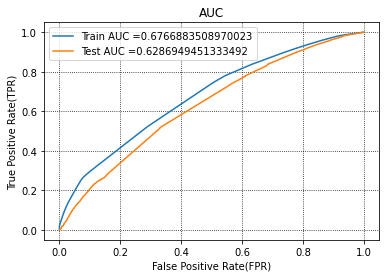

In [140]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
dt_tfidf_test_model_1 = DecisionTreeClassifier(class_weight='balanced',
                                       min_samples_split=best_min_sample_split_1,
                                       max_depth=best_max_depth_1)
dt_tfidf_test_model_1.fit(X_tr_set1, y_train)


y_train_pred_1 = dt_tfidf_test_model_1.predict_proba(X_tr_set1)[:,1]
predictions_train_set1 = dt_tfidf_test_model_1.predict(X_tr_set1)


y_test_pred = dt_tfidf_test_model_1.predict_proba(X_te_set1)[:,1]
predictions_test_set1=dt_tfidf_test_model_1.predict(X_te_set1)


# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()
auc_train_set1 = auc(train_fpr, train_tpr)
auc_test_set1 = auc(test_fpr, test_tpr)

ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

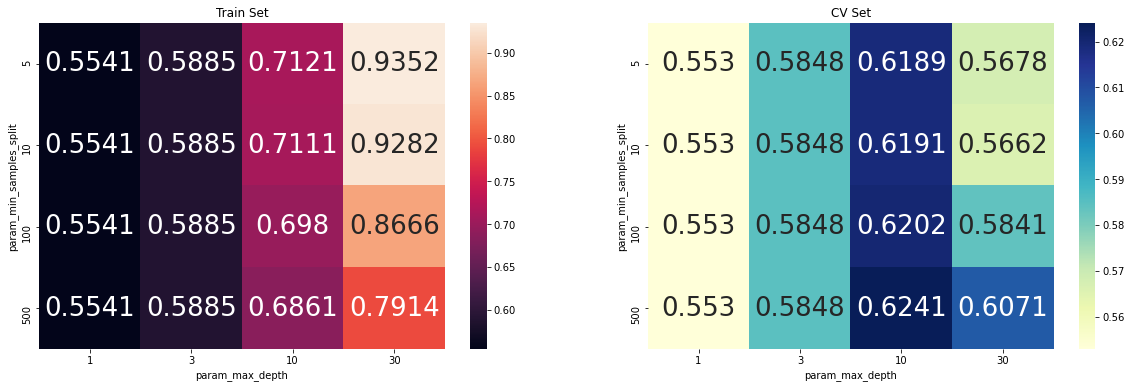

In [141]:
# https://likegeeks.com/seaborn-heatmap-tutorial/
max_scores_1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.heatmap(max_scores_1.mean_train_score, annot = True, fmt='.4g', ax=ax[0],annot_kws={'size': 26})
sns.heatmap(max_scores_1.mean_test_score, annot = True, fmt='.4g', ax=ax[1],annot_kws={'size': 26},cmap='YlGnBu')
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [142]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.37192787949986345 for threshold 0.514
Train confusion matrix
[[ 8604  3542]
 [32228 35626]]


[Text(0.5, 15.0, 'Predected'), Text(33.0, 0.5, 'Actual')]

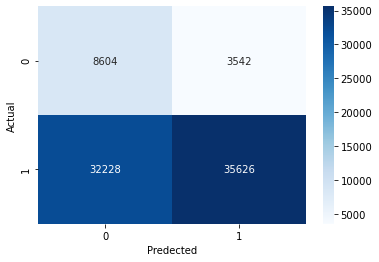

In [143]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred_1, best_t))
print(cm_train)
p = sns.heatmap(cm_train, annot=True, fmt="d", cmap='Blues')
p.set(xlabel='Predected', ylabel='Actual')

Test confusion matrix
[[2030 1007]
 [8167 8796]]


[Text(0.5, 15.0, 'Predected'), Text(33.0, 0.5, 'Actual')]

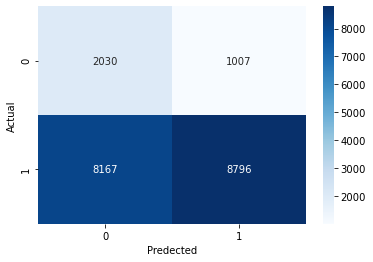

In [144]:
print("Test confusion matrix")
#print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cm_test)
p = sns.heatmap(cm_test, annot=True, fmt="d", cmap='Blues')
p.set(xlabel='Predected', ylabel='Actual')

### False positive ponit's Word Cloud, Box Plot & PDF

In [145]:
FP_essay_test_set1 = []
FP_price_test_set1 = []
FP_previous_posted_test_set1 = []

FP_essay_test_set2 = []
FP_price_test_set2 = []
FP_previous_posted_test_set2 = []

# set 3 for non zero features
FP_essay_test_set3 = []
FP_price_test_set3 = []
FP_previous_posted_test_set3 = []

In [146]:
def retrieving_false_positives(set):
    if(set == 1):
        FP_test_indexes_set1 = []
        for i in range(len(y_test)):
            if(y_test.values[i]==0 and predictions_test_set1[i]==1 ):
                FP_test_indexes_set1.append(i)

        for i in FP_test_indexes_set1:
            FP_essay_test_set1.append(X_test['essay'].values[i])
            FP_price_test_set1.append(X_test['price'].values[i])
            FP_previous_posted_test_set1.append(X_test['teacher_number_of_previously_posted_projects'].values[i])
        

    if(set == 2):
        FP_test_indexes_set2 = []
        for i in range(len(y_test)):
            if(y_test.values[i]==0 and predictions_test_set2[i]==1 ):
                FP_test_indexes_set2.append(i)

        for i in FP_test_indexes_set2:
            FP_essay_test_set2.append(X_test['essay'].values[i])
            FP_price_test_set2.append(X_test['price'].values[i])
            FP_previous_posted_test_set2.append(X_test['teacher_number_of_previously_posted_projects'].values[i])
    
    if(set == 3):
        FP_test_indexes_set3 = []
        for i in range(len(y_test)):
            if(y_test.values[i]==0 and predictions_test_set3[i]==1 ):
                FP_test_indexes_set3.append(i)

        for i in FP_test_indexes_set3:
            FP_essay_test_set3.append(X_test['essay'].values[i])
            FP_price_test_set3.append(X_test['price'].values[i])
            FP_previous_posted_test_set3.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

In [147]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/    


def print_word_cloud(FP_list):
    comment_words = ''
    stopwords = set(STOPWORDS) 

    # for val in dataFrame.CONTENT: 
    for val in FP_list:

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)


# Function for printing Box plot
def print_box_plot(FP_list):
    plt.boxplot(FP_list)
    plt.title('Box Plot for PRICE in False Positives')
    plt.ylabel('Price')
    plt.grid()
    plt.show()
    

# Function for Printing PDF
def print_pdf(FP_list):
    plt.figure(figsize=(10,3))
    sns.distplot(FP_list)
    plt.title('PDF for Teacher number who previously posted projects in False Positives')
    plt.xlabel('Teacher number who previously posted projects')
    plt.show()

In [148]:
retrieving_false_positives(1) # set == '1'

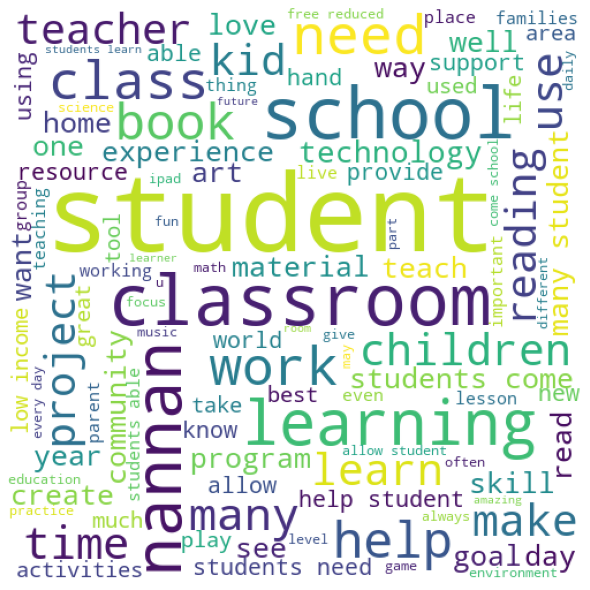

In [149]:
print_word_cloud(FP_essay_test_set1)

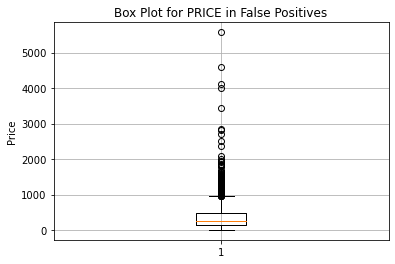

In [150]:
print_box_plot(FP_price_test_set1)

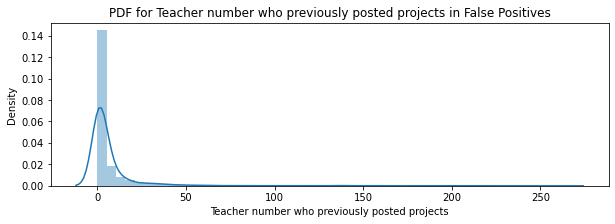

In [151]:
print_pdf(FP_previous_posted_test_set1)

# <u>SET 2:-</u>
<br>

In [152]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# from scipy.sparse import hstack
# X_train_essay_tfidf
X_tr_set2 = hstack((X_train_tfidf_w2v_vectors,
                    X_train_clean_categories_ohe,
                    X_train_clean_subcategories_ohe,
                    X_train_grade_ohe,
                    X_train_state_ohe,
                    X_train_teacher_ohe,
                    X_train_price_norm,
                    X_train_previously_posted_projects_norm,
                    X_train_essay_sentiment_neg,
                    X_train_essay_sentiment_neu,
                    X_train_essay_sentiment_pos,
                    X_train_essay_sentiment_comp)).tocsr()

X_te_set2 = hstack((X_test_tfidf_w2v_vectors,
                    X_test_clean_categories_ohe,
                    X_test_clean_subcategories_ohe,
                    X_test_grade_ohe,
                    X_test_state_ohe,
                    X_test_teacher_ohe,
                    X_test_price_norm,
                    X_test_previously_posted_projects_norm,
                    X_test_essay_sentiment_neg,
                    X_test_essay_sentiment_neu,
                    X_test_essay_sentiment_pos,
                    X_test_essay_sentiment_comp)).tocsr()

print('Final Data Matrix')
print(X_tr_set2.shape, y_train.shape)
print(X_te_set2.shape, y_test.shape)
print('='*120)

Final Data Matrix
(80000, 405) (80000,)
(20000, 405) (20000,)


In [153]:
# Perform Hyperparameter Tuning.

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# from sklearn.model_selection import GridSearchCV

dt_tfidf = DecisionTreeClassifier(class_weight='balanced')

In [154]:
# Create the parameter grid based on the results of random search 
# The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])
# Find the best hyper parameter which will give the maximum AUC value

parameters = {
    'max_depth': [1, 3, 10, 30],
    'min_samples_split': [5, 10, 100, 500]
}

In [155]:
# Instantiate the grid search model
clf2 = GridSearchCV(dt_tfidf, parameters, cv=3, scoring='roc_auc', verbose=1, return_train_score=True, n_jobs=-1)

In [156]:
%%time
clf2.fit(X_tr_set2, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Wall time: 13min 50s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [157]:
clf2.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)

In [158]:
train_auc = clf2.cv_results_['mean_train_score']
train_auc_std = clf2.cv_results_['std_train_score']

cv_auc = clf2.cv_results_['mean_test_score']
cv_auc_std = clf2.cv_results_['std_test_score']

best_max_depth_2 = clf2.best_params_['max_depth']
best_min_sample_split_2 = clf2.best_params_['min_samples_split']
best_score_2 = clf2.best_score_

print('Best Max Depth: ', best_max_depth_2)
print('Best Min Sample Leafs: ', best_min_sample_split_2)
print('Best Score: ', best_score_2)

Best Max Depth:  10
Best Min Sample Leafs:  500
Best Score:  0.601780800347113


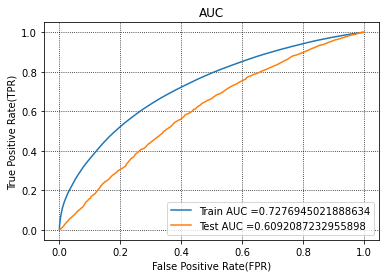

In [159]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
dt_tfidf_test_model_2 = DecisionTreeClassifier(class_weight='balanced',
                                       min_samples_split=best_min_sample_split_2,
                                       max_depth=best_max_depth_2)

dt_tfidf_test_model_2.fit(X_tr_set2, y_train)


y_train_pred_2 = dt_tfidf_test_model_2.predict_proba(X_tr_set2)[:,1]
predictions_train_set2 = dt_tfidf_test_model_2.predict(X_tr_set2)


y_test_pred_2 = dt_tfidf_test_model_2.predict_proba(X_te_set2)[:,1]
predictions_test_set2=dt_tfidf_test_model_2.predict(X_te_set2)


# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_2)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_2)

ax = plt.subplot()
auc_train_set2 = auc(train_fpr, train_tpr)
auc_test_set2 = auc(test_fpr, test_tpr)

ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

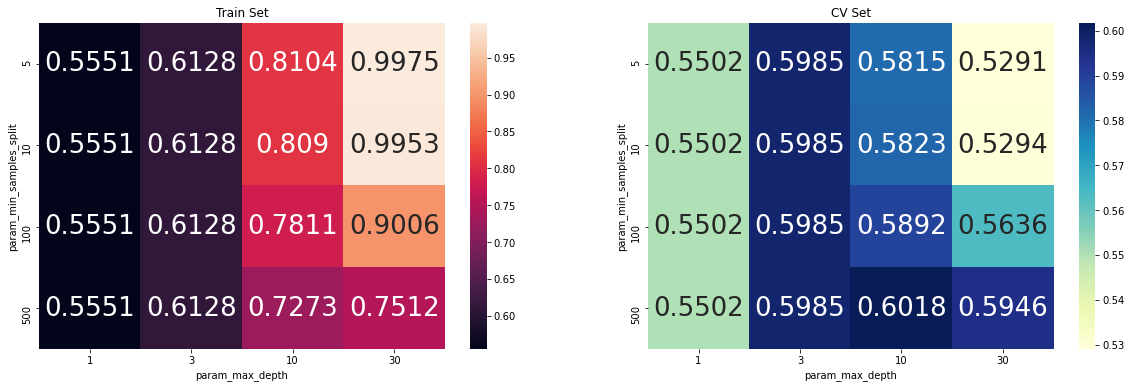

In [160]:
# https://likegeeks.com/seaborn-heatmap-tutorial/
max_scores_2 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.heatmap(max_scores_2.mean_train_score, annot = True, fmt='.4g', ax=ax[0],annot_kws={'size': 26})
sns.heatmap(max_scores_2.mean_test_score, annot = True, fmt='.4g', ax=ax[1],annot_kws={'size': 26},cmap='YlGnBu')
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

the maximum value of tpr*(1-fpr) 0.44568516946025144 for threshold 0.488
Train confusion matrix
[[ 8345  3801]
 [23838 44016]]


[Text(0.5, 15.0, 'Predected'), Text(33.0, 0.5, 'Actual')]

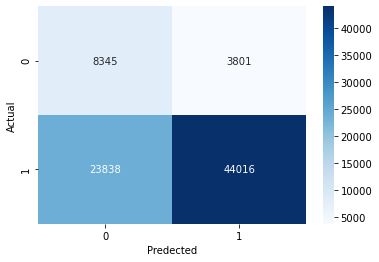

In [161]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred_2, best_t))
print(cm_train)
p = sns.heatmap(cm_train, annot=True, fmt="d", cmap='Blues')
p.set(xlabel='Predected', ylabel='Actual')

Test confusion matrix
[[ 1653  1384]
 [ 6362 10601]]


[Text(0.5, 15.0, 'Predected'), Text(33.0, 0.5, 'Actual')]

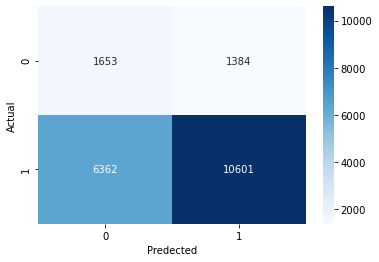

In [162]:
print("Test confusion matrix")
#print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred_2, best_t))
print(cm_test)
p = sns.heatmap(cm_test, annot=True, fmt="d", cmap='Blues')
p.set(xlabel='Predected', ylabel='Actual')

In [163]:
retrieving_false_positives(2) # set == '2'

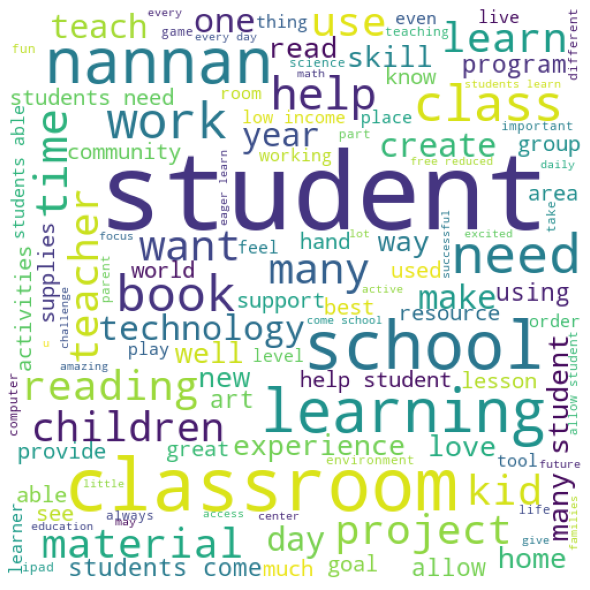

In [164]:
print_word_cloud(FP_essay_test_set2)

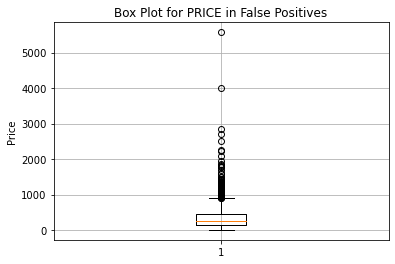

In [165]:
print_box_plot(FP_price_test_set2)

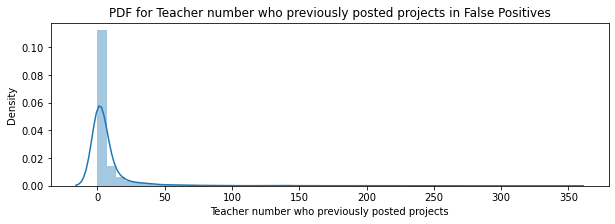

In [166]:
print_pdf(FP_previous_posted_test_set2)

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

### Applying Decision Tree on Important Feature dataset :- 

In [167]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.

In [168]:
# https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error

def select_k_features(model, X, k):
    return X[:,model.feature_importances_.argsort()[::-1][:k]]

In [169]:
dt_tfidf_imp_feature_test_model = DecisionTreeClassifier(class_weight='balanced')
dt_tfidf_imp_feature_test_model.fit(X_tr_set1, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [170]:
non_zero_features = 0
for i in range (len(dt_tfidf_imp_feature_test_model.feature_importances_)):
    if(dt_tfidf_imp_feature_test_model.feature_importances_[i]>0):
        non_zero_features += 1
#         print(dt_tfidf_imp_feature_test_model.feature_importances_[i])

In [171]:
non_zero_features

2987

In [172]:
X_tr_set3 = select_k_features(dt_tfidf_imp_feature_test_model, X_tr_set1, non_zero_features)
X_te_set3 = select_k_features(dt_tfidf_imp_feature_test_model, X_te_set1, non_zero_features)

In [173]:
print('Final Data Matrix')
print(X_tr_set3.shape, y_train.shape)
print(X_te_set3.shape, y_test.shape)
print('='*120)

Final Data Matrix
(80000, 2987) (80000,)
(20000, 2987) (20000,)


In [174]:
# Instantiate the grid search model
clf3 = GridSearchCV(dt_tfidf, parameters, cv=3, scoring='roc_auc', verbose=1, return_train_score=True, n_jobs=-1)

In [175]:
%%time
clf3.fit(X_tr_set3, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Wall time: 5min 57s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [176]:
clf3.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)

In [177]:
train_auc = clf3.cv_results_['mean_train_score']
train_auc_std = clf3.cv_results_['std_train_score']

cv_auc = clf3.cv_results_['mean_test_score']
cv_auc_std = clf3.cv_results_['std_test_score']

best_max_depth_3 = clf3.best_params_['max_depth']
best_min_sample_split_3 = clf3.best_params_['min_samples_split']
best_score_3 = clf3.best_score_

print('Best Max Depth: ', best_max_depth_3)
print('Best Min Sample Leafs: ', best_min_sample_split_3)
print('Best Score: ', best_score_3)

Best Max Depth:  10
Best Min Sample Leafs:  500
Best Score:  0.6244882956911026


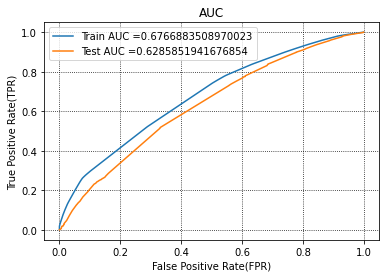

In [178]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
dt_imp_feature_tfidf = DecisionTreeClassifier(class_weight='balanced',
                                       min_samples_split=best_min_sample_split_3,
                                       max_depth=best_max_depth_3)
dt_imp_feature_tfidf.fit(X_tr_set3, y_train)


y_train_pred_3 = dt_imp_feature_tfidf.predict_proba(X_tr_set3)[:,1]
predictions_train_set3 = dt_imp_feature_tfidf.predict(X_tr_set3)


y_test_pred_3 = dt_imp_feature_tfidf.predict_proba(X_te_set3)[:,1]
predictions_test_set3 = dt_imp_feature_tfidf.predict(X_te_set3)


# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_3)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_3)

ax = plt.subplot()
auc_train_set3 = auc(train_fpr, train_tpr)
auc_test_set3 = auc(test_fpr, test_tpr)

ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

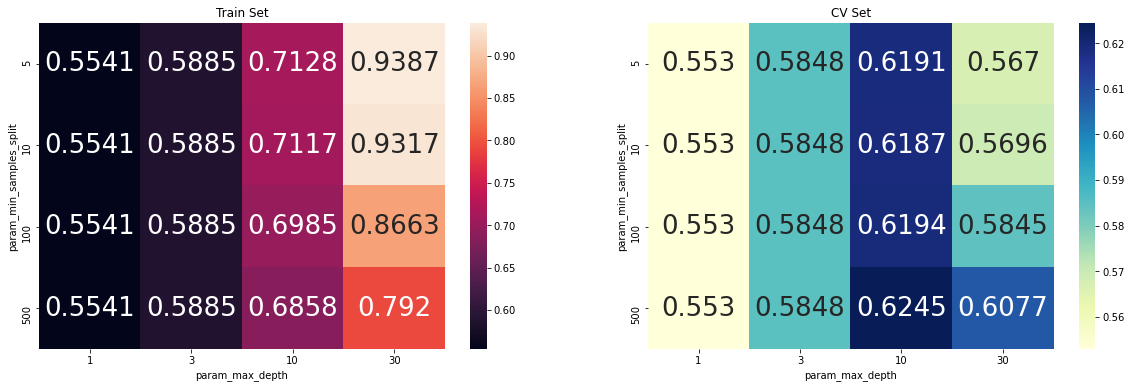

In [179]:
# https://likegeeks.com/seaborn-heatmap-tutorial/
max_scores_3 = pd.DataFrame(clf3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.heatmap(max_scores_3.mean_train_score, annot = True, fmt='.4g', ax=ax[0],annot_kws={'size': 26})
sns.heatmap(max_scores_3.mean_test_score, annot = True, fmt='.4g', ax=ax[1],annot_kws={'size': 26},cmap='YlGnBu')
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

the maximum value of tpr*(1-fpr) 0.37192787949986345 for threshold 0.514
Train confusion matrix
[[ 8604  3542]
 [32228 35626]]


[Text(0.5, 15.0, 'Predected'), Text(33.0, 0.5, 'Actual')]

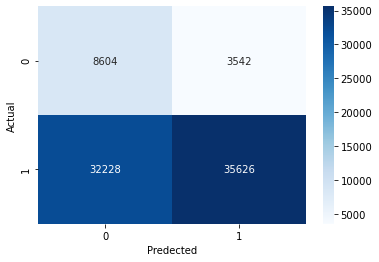

In [180]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred_3, best_t))
print(cm_train)
p = sns.heatmap(cm_train, annot=True, fmt="d", cmap='Blues')
p.set(xlabel='Predected', ylabel='Actual')

Test confusion matrix
[[2029 1008]
 [8163 8800]]


[Text(0.5, 15.0, 'Predected'), Text(33.0, 0.5, 'Actual')]

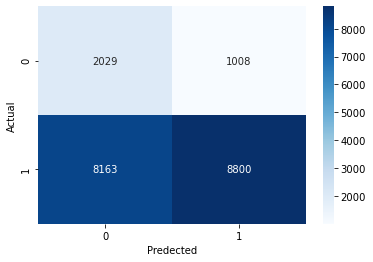

In [181]:
print("Test confusion matrix")
#print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred_3, best_t))
print(cm_test)
p = sns.heatmap(cm_test, annot=True, fmt="d", cmap='Blues')
p.set(xlabel='Predected', ylabel='Actual')

In [182]:
retrieving_false_positives(3) # set == 3

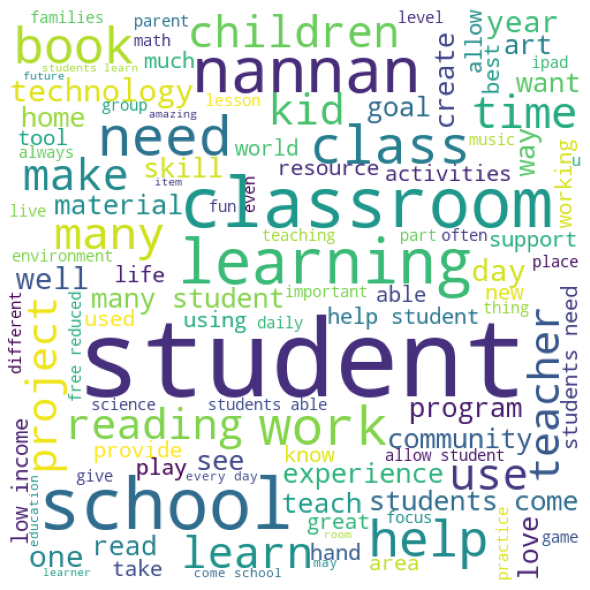

In [183]:
print_word_cloud(FP_essay_test_set3)

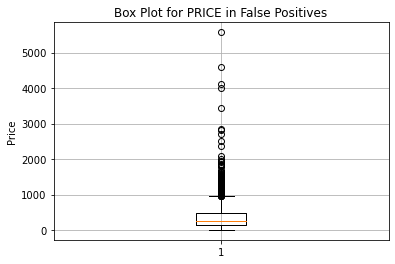

In [184]:
print_box_plot(FP_price_test_set3)

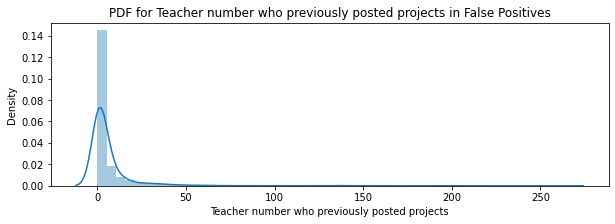

In [185]:
print_pdf(FP_previous_posted_test_set3)

In [186]:
# Tabulate your results

In [187]:
# Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter values, training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Min Sample Split", "Max Tree Depth", "Train AUC", "Test AUC"]


x.add_row(["TF-IDF", "Decision Tree", best_min_sample_split_1, best_max_depth_1, round(auc_train_set1, 2), round(auc_test_set1, 2)])
x.add_row(["TF-IDF W2V", "Decision Tree", best_min_sample_split_2, best_max_depth_2, round(auc_train_set2, 2), round(auc_test_set2, 2)])
x.add_row(["TF-IDF (imp feat)", "Decision Tree", best_min_sample_split_3, best_max_depth_3, round(auc_train_set3, 2), round(auc_test_set3, 2)])


print(x)

+-------------------+---------------+------------------+----------------+-----------+----------+
|     Vectorizer    |     Model     | Min Sample Split | Max Tree Depth | Train AUC | Test AUC |
+-------------------+---------------+------------------+----------------+-----------+----------+
|       TF-IDF      | Decision Tree |       500        |       10       |    0.68   |   0.63   |
|     TF-IDF W2V    | Decision Tree |       500        |       10       |    0.73   |   0.61   |
| TF-IDF (imp feat) | Decision Tree |       500        |       10       |    0.68   |   0.63   |
+-------------------+---------------+------------------+----------------+-----------+----------+
